## exam3-5 BVP by ODE



**This is an exam. You must be present in the exam room to get credit for this problem unless you have prior permission from the instructor. You may not talk during the exam except to ask an instructor a question. By turning this in, you agree that this work is your own, and you did not get unauthorized help to complete it or provide unauthorized help to anyone else. You may not modify your exam answer after the due time without permission.**

In this problem we learn a new way to solve a *linear* boundary value problem. The problem of interest is:

$y'''(x) - x^2 y = -x^4$ with $y(0)=0, y'(0)=0, y(2)=4$.

This will take some steps, so read the following carefully. Some of these steps will be worked out, and others you will be asked to complete. You *do not need to derive these*, they are here to guide what you will do.

First, we recall that the general solution of a linear ODE can be written as a linear combination of solutions to the homogeneous equation (where the right hand side is zero) and a particular solution to the non-homogeneous equation (where the right hand side in this case is $-x^4$).

Here are the homogeneous versions and the particular version of the equation above, expressed in *initial value form*. The initial conditions are chosen here to provide three linearly independent functions $Y_1, Y_2$, and $Y_3$. For $Y_p$ any values can be used since any particular solution will do.

$Y_1''' - x^2 Y_1 = 0$ with $Y_1(0)=1, Y_1'(0)=0, Y_1''(0)=0$

$Y_2''' - x^2 Y_2 = 0$ with $Y_2(0)=0, Y_2'(0)=1, Y_2''(0)=0$

$Y_3''' - x^2 Y_3 = 0$ with $Y_3(0)=0, Y_3'(0)=0, Y_3''(0)=1$

$Y_p''' - x^2 Y_p = -x^4$ with $Y_p(0)=0, Y_p'(0)=0, Y_p''(0)=0$

These can be combined to form the general solution to the differential equation.

$y(x) = C_1 Y_1(x) + C_2 Y_2(x) + C_3 Y_3(x) + Y_p(x)$

To get towards a solution to the original BVP, we next apply the boundary conditions to find the constants $C_i$.

$y(0) = 0 = C_1 + 0 + 0 + 0$

$y'(0) = 0 = 0 + C_2 + 0 + 0$

$y(2) = 4 = C_1 Y_1(2) + C_2 Y_2(2) + C_3 Y_3(2) + Y_p(2)$

Combined, these lead to:

$y(x) = \frac{4 - Y_p(2)}{Y_3(2)} Y_3(x) + Y_p(x)$ where $Y_p(2)$ means the function $Y_p$ evaluated at $x=2$ and $Y_3(2)$ means the function $Y_3$ evaluated at $x=2$.

That is remarkably the solution to the boundary value problem originally stated, and we can now get $Y_3$ and $Y_p$ by integrating two *ordinary initial value* differential equations!



### Solve for $Y_3$ and $Y_p$



Find solutions to these two initial value ODEs over the range of $x=0$ to $x=2$:

$Y_3''' - x^2 Y_3 = 0$ with $Y_3(0)=0, Y_3'(0)=0, Y_3''(0)=1$

Note that in the next step you will need to evaluate $Y_3(2)$ and $Y_p(2)$.



In [1]:
from IPython.core.display import display, HTML
display(HTML(
    '<style>'
        '#notebook { padding-top:0px !important; } ' 
        '.container { width:100% !important; } '
        '.end_space { min-height:0px !important; } '
    '</style>'
))

$Y_p''' - x^2 Y_p = -x^4$ with $Y_p(0)=0, Y_p'(0)=0, Y_p''(0)=0$



### Combine them to get a solution to the BVP



Use your solutions to create the overall solution. $Y_p(2)$ means evaluate $Y_p(x)$ at $x=2$. $Y_3(2)$ means evaluate $Y_3(x)$ at $x=2$. You can do this anyway you want.

$y(x) = \frac{4 - Y_p(2)}{Y_3(2)} Y_3(x) + Y_p(x)$

Make a plot of $y(x)$.



## Linear BVP



In [2]:
import numpy as np
from scipy.integrate import solve_bvp, solve_ivp
import scipy.optimize as opt
import matplotlib.pyplot as plt

1.9999421957541585

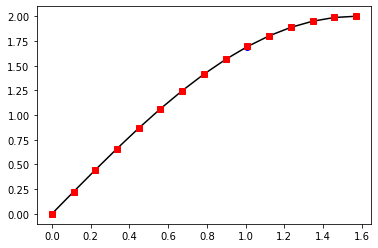

In [58]:
def bvp(x,var):
    y, yp = var
    dydx  = yp
    dypdx = -y
    return np.array([dydx, dypdx])

def bc(vara, varb):
    ya, ypa = vara
    yb, ypb = varb
    bc1     = ya
    bc2     = yb - 2
    return np.array([bc1, bc2])

xspan = (0, np.pi/2)
xeval = np.linspace(*xspan, 15)
yguess = 2*np.sin(xeval)
ypguess = np.ones(len(yguess))
varguess = np.array([yguess, ypguess])
sol = solve_bvp(bvp, bc, xeval, varguess)
y, yp = sol.y
x     = sol.x
plt.plot(x,y,'k-', x, 2*np.sin(x), 'bo')

var0 = np.array([0,2])
sol  = solve_ivp(bvp, xspan, var0, t_eval = xeval)
x    = sol.t
y, yp = sol.y
plt.plot(x,y, 'rs')
y[-1]

This boundary value problem is linear.

$y'' + y = 0$

With boundary conditions $y(0) = 0$ and $y(\pi/2) = 2$

First, derive the equations that approximate this equation using finite differences. You should write out the equations in a form that allow you to construct a set of linear equations, e.g. $\mathbf{A} \mathbf{y} = \mathbf{b}$.



Next, write code to construct $\mathbf{A}$ and $\mathbf{b}$, and solve for $\mathbf{y}$.



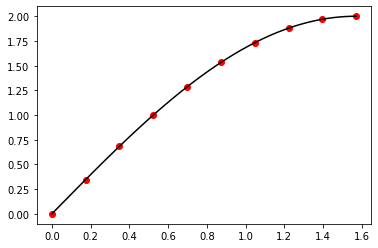

In [74]:
ya = 0
yb = 2
xplot    = np.linspace(0, np.pi/2, 1000)
yplot    = 2*np.sin(xplot)
xspan, h = np.linspace(0, np.pi/2, 10, retstep = True)
EYE      = np.eye(len(xspan)-2) * (h**2 - 2)
LOW      = np.diag(np.ones(len(EYE)-1),-1)
UPP      = np.diag(np.ones(len(EYE)-1), 1)
A        = EYE + LOW + UPP
RHS      = np.zeros([A.shape[0], 1])
RHS[0]   = -ya
RHS[-1]  = -yb
vals     = np.linalg.solve(A, RHS)
yfdm     = np.concatenate(([ya], vals[:,0], [yb]))
plt.plot(xspan, yfdm, 'ro')
plt.plot(xplot, yplot, 'k-')

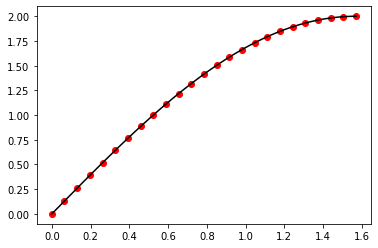

In [105]:
ya = 0
yb = 2
xplot     = np.linspace(0, np.pi/2, 1000)
yplot     = 2*np.sin(xplot)
xspan, h  = np.linspace(0, np.pi/2, 25, retstep = True)
A1        = np.eye(len(xspan))*(h**2 - 2)
A2        = np.diag(np.ones(len(xspan)-1),-1)
A3        = np.diag(np.ones(len(xspan)-1),1)
A         = A1 + A2 + A3
A[0,0]    = 1
A[0,1]    = 0
A[-1,-1]  = 1
A[-1,-2]  = 0
RHS       = np.zeros([A.shape[0], 1])
RHS[0]    = ya
RHS[-1]   = yb
vals      = np.linalg.solve(A, RHS)
yfdm      = vals
plt.plot(xspan, yfdm, 'ro')
plt.plot(xplot, yplot, 'k-')

Show some evidence that your solution is reasonable.



Finally, there is a known analytical solution to this equation: $y = 2 \sin x$. Compare your answer to the known solution.



## linear regression



At [https://www.itl.nist.gov/div898/handbook/pmd/section4/pmd44.htm>](https://www.itl.nist.gov/div898/handbook/pmd/section4/pmd44.htm>)there is a dataset that describes the ambient pressure and temperature in the atmosphere.
Run this cell to retrieve the data. It will download into a file called PT.txt.



In [106]:
import urllib.request
url = 'https://www.itl.nist.gov/div898/handbook/datasets/MODEL-4_4_4.DAT'
urllib.request.urlretrieve(url, 'PT.txt')

('PT.txt', <http.client.HTTPMessage at 0x26c8c2306c8>)

Here, we print the first three lines of the file to see what is in it.



In [107]:
with open('PT.txt') as f:
    print(''.join(f.readlines()[0:3]))

 Run          Ambient                            Fitted
Order  Day  Temperature  Temperature  Pressure    Value    Residual
 1      1      23.820      54.749      225.066   222.920     2.146



Next, we read the file into numpy arrays.



In [108]:
import numpy as np
data = np.loadtxt('PT.txt', skiprows=2)
T = data[:, 3]
P = data[:, 4]

Make a plot of P vs. T.



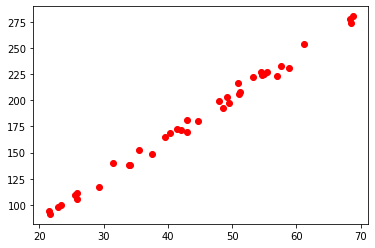

In [109]:
plt.plot(T,P, 'ro')

Fit a model of the form $P = \beta_0 + beta_1 T$ to this data. Show the confidence intervals on the parameters, and how the model fits the data.



[7.74899739 3.93014044]


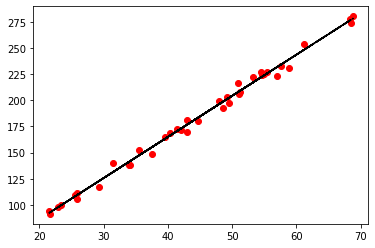

In [131]:
TMAT = np.zeros([len(T), 2])
TMAT[:,0] = 1
TMAT[:,1] = T
PVEC      = P

BETA = np.linalg.inv(TMAT.T @ TMAT) @ (TMAT.T @ PVEC)
PMOD = TMAT @ BETA 
plt.plot(T,P,'ro', T, PMOD, 'k-.')
print(BETA)

In [148]:
from scipy.optimize import curve_fit
from pycse import nlinfit
from scipy.stats.distributions import t

alpha = 0.05  # 95% confidence interval = 100*(1-alpha)

n = len(T)    # number of data points
p = 2  # number of parameters

dof = max(0, n - p)  # number of degrees of freedom

# student-t value for the dof and confidence level
tval = t.ppf(1.0 - alpha / 2., dof)

def PRESSURE(T, beta0, beta1):
    return beta0 + beta1*T
pars, pars_ci, se = nlinfit(PRESSURE, T, P, [1, 1], alpha=0.05)
print(pars, '\n\n', pars_ci, '\n\n', se)

popt, pcov = curve_fit(PRESSURE, T, P, [1,1])
print(popt, '\n\n', pcov)

se = np.sqrt(np.diag(pcov))
ci = np.zeros(se.shape)
ci[0] = se[0]*tval
ci[1] = se[1]*tval
print(ci, popt + ci)


[7.74899745 3.93014044] 

 [[ 2.98388248 12.51411242]
 [ 3.82749994  4.03278094]] 

 [2.35384742 0.05070183]
[7.74899745 3.93014044] 

 [[ 5.54059765e+00 -1.14259726e-01]
 [-1.14259726e-01  2.57067604e-03]]
[4.76511497 0.1026405 ] [12.51411242  4.03278094]


Compare your fit to the fit described at  [https://www.itl.nist.gov/div898/handbook/pmd/section4/pmd44.htm>](https://www.itl.nist.gov/div898/handbook/pmd/section4/pmd44.htm>).

